In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Video_Games_5.json.gz')

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 9 columns):
reviewerID        231780 non-null object
asin              231780 non-null object
reviewerName      228967 non-null object
helpful           231780 non-null object
reviewText        231780 non-null object
overall           231780 non-null float64
summary           231780 non-null object
unixReviewTime    231780 non-null int64
reviewTime        231780 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 17.7+ MB


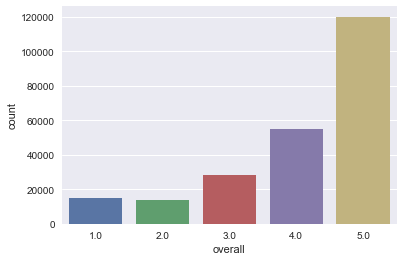

In [8]:
sns.countplot(df['overall'])

In [60]:
data = df.copy()

In [61]:
data.drop(['reviewerID', 
           'asin', 
           'reviewerName', 
           'helpful', 
           'unixReviewTime', 
           'reviewTime'], 
          axis=1,
          inplace=True)

In [62]:
data.head()

,reviewText,overall,summary
0,Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.
1,If you like rally cars get this game you will ...,4.0,Good rally game
2,1st shipment received a book instead of the ga...,1.0,Wrong key
3,"I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!"
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3


In [63]:
keywords = ['bad', 'broken', 'poor']

In [64]:
for key in keywords:
    data[str(key)] = ( 
        data.summary.str.contains(
        ' ' + str(key) + ' ',
        case=False) 
        |
        data.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False) 
        
    )

In [65]:
data.head()

,reviewText,overall,summary,bad,broken,poor
0,Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,False,False,False
1,If you like rally cars get this game you will ...,4.0,Good rally game,False,False,False
2,1st shipment received a book instead of the ga...,1.0,Wrong key,False,False,False
3,"I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",False,False,False
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,False,False,False


In [66]:
data['poor_quality'] = (data['overall'] < 3)

In [67]:
data.head()

,reviewText,overall,summary,bad,broken,poor,poor_quality
0,Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,False,False,False,True
1,If you like rally cars get this game you will ...,4.0,Good rally game,False,False,False,False
2,1st shipment received a book instead of the ga...,1.0,Wrong key,False,False,False,True
3,"I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",False,False,False,False
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,False,False,False,False


In [68]:
X = data.drop(['overall', 'poor_quality', 'reviewText', 'summary'], axis=1)
y = data.poor_quality

In [69]:
from sklearn.naive_bayes import BernoulliNB

In [70]:
nb = BernoulliNB()

In [71]:
nb.fit(X, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [72]:
nb_y_pred = nb.predict(X)

In [73]:
num_incorrect = (nb_y_pred != y).sum()
total = data.shape[0]

num_incorrect / total

0.12320303736301666